<a href="https://colab.research.google.com/github/zedeme/Argentinian-Birds/blob/main/gh_ArgentinianBirds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [4]:
df = pd.read_csv("/content/sample_data/0083021-210914110416597.csv", sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
df

gbifID                            datasetKey  ... mediaType issue
0       3295716693  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
1       1200515657  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
2       3214991044  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
3       1769772056  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
4       3209476037  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
...            ...                                   ...  ...       ...   ...
107247  3214521601  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
107248  3207533626  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
107249  2745273483  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
107250  2801019189  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN
107251  2707198729  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...       NaN   NaN

[107252 rows x 50 columns]

In [6]:
df.describe()

gbifID  infraspecificEpithet  ...  establishmentMeans  mediaType
count  1.072520e+05                   0.0  ...                 0.0        0.0
mean   2.405060e+09                   NaN  ...                 NaN        NaN
std    6.237524e+08                   NaN  ...                 NaN        NaN
min    1.469212e+08                   NaN  ...                 NaN        NaN
25%    2.092406e+09                   NaN  ...                 NaN        NaN
50%    2.228988e+09                   NaN  ...                 NaN        NaN
75%    2.786724e+09                   NaN  ...                 NaN        NaN
max    3.301316e+09                   NaN  ...                 NaN        NaN

[8 rows x 24 columns]

In [7]:
df.dtypes

gbifID                                int64
datasetKey                           object
occurrenceID                         object
kingdom                              object
phylum                               object
class                                object
order                                object
family                               object
genus                                object
species                              object
infraspecificEpithet                float64
taxonRank                            object
scientificName                       object
verbatimScientificName               object
verbatimScientificNameAuthorship    float64
countryCode                          object
locality                             object
stateProvince                        object
occurrenceStatus                     object
individualCount                     float64
publishingOrgKey                     object
decimalLatitude                     float64
decimalLongitude                

In [8]:
df["eventDate"] = df["eventDate"].apply(lambda x: pd.to_datetime(x))
df["lastInterpreted"] = df["lastInterpreted"].apply(lambda x: pd.to_datetime(x))

In [9]:
df[df["countryCode"] == "AR"]["gbifID"].count()

107252

In [10]:
df_ar = df[df["countryCode"] == "AR"]

In [11]:
df_ar["stateProvince"].value_counts().sort_values(ascending=False)

Buenos Aires    63690
La Pampa        41753
Río Negro        1809
Name: stateProvince, dtype: int64

In [12]:
# Dale doble click a la derecha para ver solamente el tipo de ave que estas buscando

# Github no tiene soporte para la libreria plotly, si queres ver e interactuar con el mapa podes verlo desde aca:
# https://colab.research.google.com/drive/1tbHlglUFTnQj4ayVUqgFQVVqISP47KTB?usp=sharing

px.set_mapbox_access_token("pk.eyJ1IjoiemVkZW1lIiwiYSI6ImNreGppeWcwNzJ1c2cydXN0NnNlbHdmZGgifQ.Go70x85Lf2IcXHez423EhA")
fig = px.scatter_mapbox(df_ar, lat="decimalLatitude", lon="decimalLongitude",     color="family",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=100, zoom=7)
fig.show()

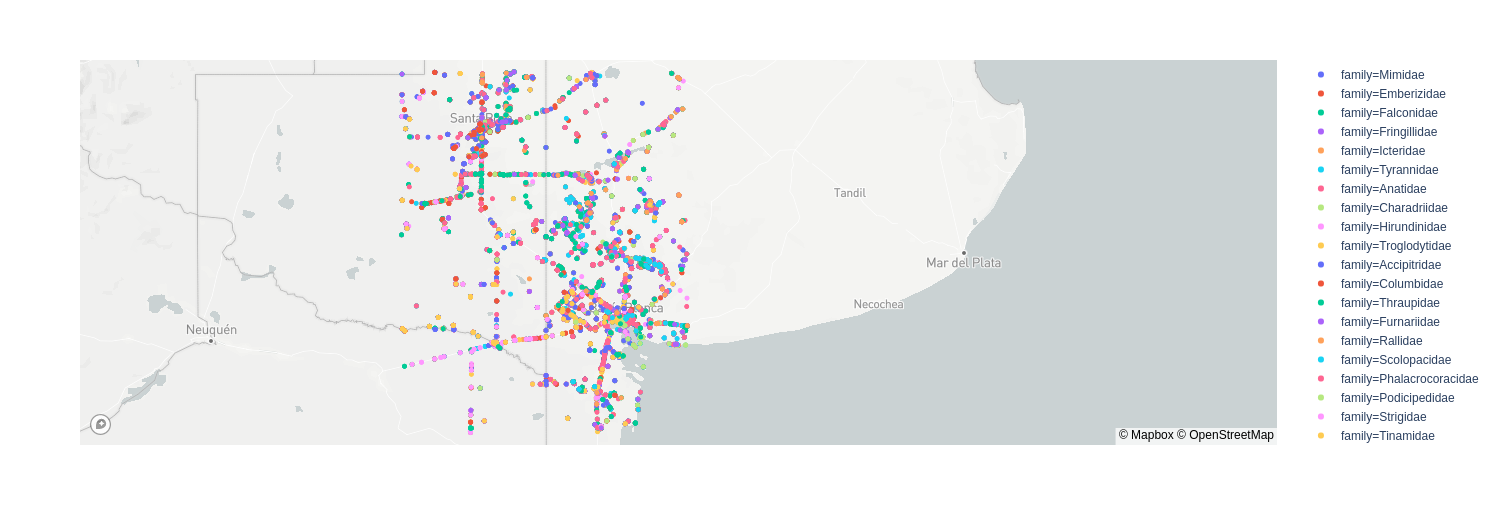

In [ ]:
df.isnull().sum()

gbifID                                   0
datasetKey                               0
occurrenceID                             0
kingdom                                  0
phylum                                   0
class                                    0
order                                    0
family                                   0
genus                                    0
species                                  0
infraspecificEpithet                107252
taxonRank                                0
scientificName                           0
verbatimScientificName                   0
verbatimScientificNameAuthorship    107252
countryCode                              0
locality                                 0
stateProvince                            0
occurrenceStatus                         0
individualCount                      16920
publishingOrgKey                         0
decimalLatitude                          0
decimalLongitude                         0
coordinateU

In [ ]:
n = df.isnull().sum()

r = []

for i in list(df_ar.columns):
  if n[i] == 107252:
    continue
  r.append(i)
len(r) == len(list(df_ar.columns))

df_ar = df_ar[r]

In [ ]:
df_ar

gbifID  ... issue
0       3295716693  ...   NaN
1       1200515657  ...   NaN
2       3214991044  ...   NaN
3       1769772056  ...   NaN
4       3209476037  ...   NaN
...            ...  ...   ...
107247  3214521601  ...   NaN
107248  3207533626  ...   NaN
107249  2745273483  ...   NaN
107250  2801019189  ...   NaN
107251  2707198729  ...   NaN

[107252 rows x 35 columns]

In [ ]:
df_ar.isnull().sum()

gbifID                         0
datasetKey                     0
occurrenceID                   0
kingdom                        0
phylum                         0
class                          0
order                          0
family                         0
genus                          0
species                        0
taxonRank                      0
scientificName                 0
verbatimScientificName         0
countryCode                    0
locality                       0
stateProvince                  0
occurrenceStatus               0
individualCount            16920
publishingOrgKey               0
decimalLatitude                0
decimalLongitude               0
eventDate                      0
day                            0
month                          0
year                           0
taxonKey                       0
speciesKey                     0
basisOfRecord                  0
institutionCode                0
collectionCode                 0
catalogNum

In [ ]:
df[df["issue"].isnull() == False]

gbifID  ...              issue
98827  2197111311  ...  TAXON_MATCH_FUZZY

[1 rows x 50 columns]

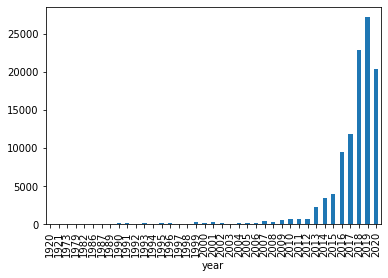

In [ ]:
df_ar.groupby("year")["gbifID"].count().plot.bar()

In [ ]:
df_ar["family"].value_counts().sort_values(ascending=False)

Tyrannidae           11477
Columbidae            8864
Furnariidae           8282
Anatidae              7395
Falconidae            7379
Icteridae             7239
Thraupidae            5165
Psittacidae           3585
Mimidae               3445
Emberizidae           3146
Hirundinidae          3125
Charadriidae          3064
Tinamidae             2626
Laridae               2470
Troglodytidae         2447
Picidae               2401
Ardeidae              2377
Rallidae              2107
Accipitridae          2020
Podicipedidae         1911
Strigidae             1485
Scolopacidae          1476
Cotingidae            1443
Recurvirostridae      1282
Passeridae            1257
Cathartidae           1120
Cuculidae             1101
Fringillidae          1066
Phoenicopteridae       931
Threskiornithidae      886
Phalacrocoracidae      803
Turdidae               766
Rheidae                705
Rhinocryptidae         361
Trochilidae            283
Motacillidae           270
Cardinalidae           206
H

In [ ]:
round((df_ar["family"].value_counts().sort_values(ascending=False) / 107252) * 100, 3) # Percent

Tyrannidae           10.701
Columbidae            8.265
Furnariidae           7.722
Anatidae              6.895
Falconidae            6.880
Icteridae             6.750
Thraupidae            4.816
Psittacidae           3.343
Mimidae               3.212
Emberizidae           2.933
Hirundinidae          2.914
Charadriidae          2.857
Tinamidae             2.448
Laridae               2.303
Troglodytidae         2.282
Picidae               2.239
Ardeidae              2.216
Rallidae              1.965
Accipitridae          1.883
Podicipedidae         1.782
Strigidae             1.385
Scolopacidae          1.376
Cotingidae            1.345
Recurvirostridae      1.195
Passeridae            1.172
Cathartidae           1.044
Cuculidae             1.027
Fringillidae          0.994
Phoenicopteridae      0.868
Threskiornithidae     0.826
Phalacrocoracidae     0.749
Turdidae              0.714
Rheidae               0.657
Rhinocryptidae        0.337
Trochilidae           0.264
Motacillidae        

In [ ]:
df_s_p = pd.pivot_table(df_ar, index="stateProvince")

In [ ]:
df_s_p["count"] = df_ar[df_ar["stateProvince"] == "Buenos Aires"]["gbifID"].count()
df_s_p[df_s_p.index == "La Pampa"] = df_ar[df_ar["stateProvince"] == "La Pampa"]["gbifID"].count()
df_s_p[df_s_p.index == "Río Negro"] = df_ar[df_ar["stateProvince"] == "Río Negro"]["gbifID"].count()

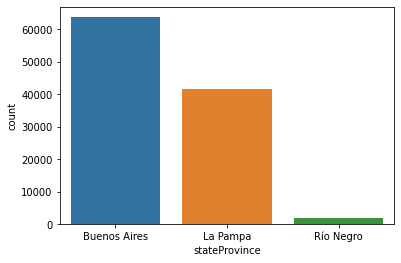

In [ ]:
sns.barplot(data=df_s_p, x=df_s_p.index, y="count")

In [ ]:
df_ar["hour"] = df_ar["lastInterpreted"].apply(lambda x: x.hour)

In [ ]:
df_ar

gbifID                            datasetKey  ... issue hour
0       3295716693  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   21
1       1200515657  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   21
2       3214991044  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   20
3       1769772056  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   21
4       3209476037  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   21
...            ...                                   ...  ...   ...  ...
107247  3214521601  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   20
107248  3207533626  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   20
107249  2745273483  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   20
107250  2801019189  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   21
107251  2707198729  4fa7b334-ce0d-4e88-aaae-2e0c138d049e  ...   NaN   21

[107252 rows x 36 columns]

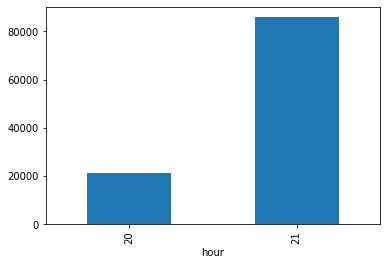

In [ ]:
df_ar.groupby("hour")["gbifID"].count().plot.bar()

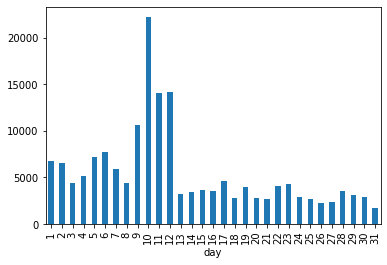

In [ ]:
df_ar.groupby("day")["gbifID"].count().plot.bar()

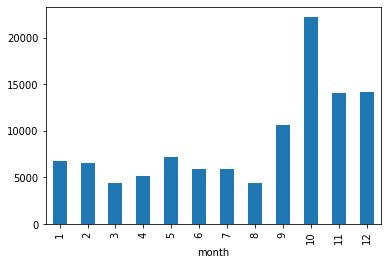

In [ ]:
df_ar.groupby("month")["gbifID"].count().plot.bar()

In [ ]:
def round_station(m):
  if m <= 3:
    return "Summer"
  if m > 3 and m <= 6:
    return "Fall"
  if m > 6 and m <= 9:
    return "Winter"
  if m > 9 and m <= 12:
    return "Spring" 

In [ ]:
df_ar["roundState"] = df_ar["month"].apply(lambda x: round_station(x))

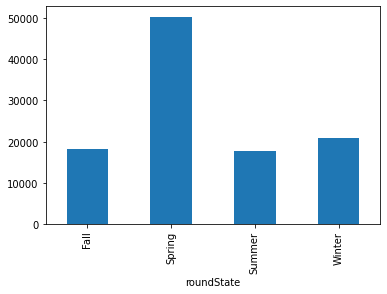

In [ ]:
df_ar.groupby("roundState")["gbifID"].count().plot.bar()

In [ ]:
pd.pivot_table(df_ar, index="roundState")

day  decimalLatitude  ...      taxonKey         year
roundState                              ...                           
Fall        13.187739       -37.860255  ...  3.882314e+06  2017.176738
Spring      14.781340       -38.067200  ...  3.970408e+06  2017.569106
Summer      14.635078       -38.130637  ...  3.843950e+06  2016.567129
Winter      16.777267       -37.864230  ...  3.986840e+06  2017.316473

[4 rows x 10 columns]

In [17]:
# Dale doble click a la derecha para ver solamente el tipo de ave que estas buscando

# Github no tiene soporte para la libreria plotly, si queres ver e interactuar con el mapa podes verlo desde aca:
# https://colab.research.google.com/drive/1tbHlglUFTnQj4ayVUqgFQVVqISP47KTB?usp=sharing

# Sector por familia de aves

px.set_mapbox_access_token("pk.eyJ1IjoiemVkZW1lIiwiYSI6ImNreGppeWcwNzJ1c2cydXN0NnNlbHdmZGgifQ.Go70x85Lf2IcXHez423EhA")

df_ar["roundLatitude"] = round(df["decimalLatitude"], 1)
df_ar["roundLongitude"] = round(df["decimalLongitude"], 1)

fig = px.scatter_mapbox(df_ar, lat="roundLatitude", lon="roundLongitude",     color="family",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=100, zoom=7)
fig.show()

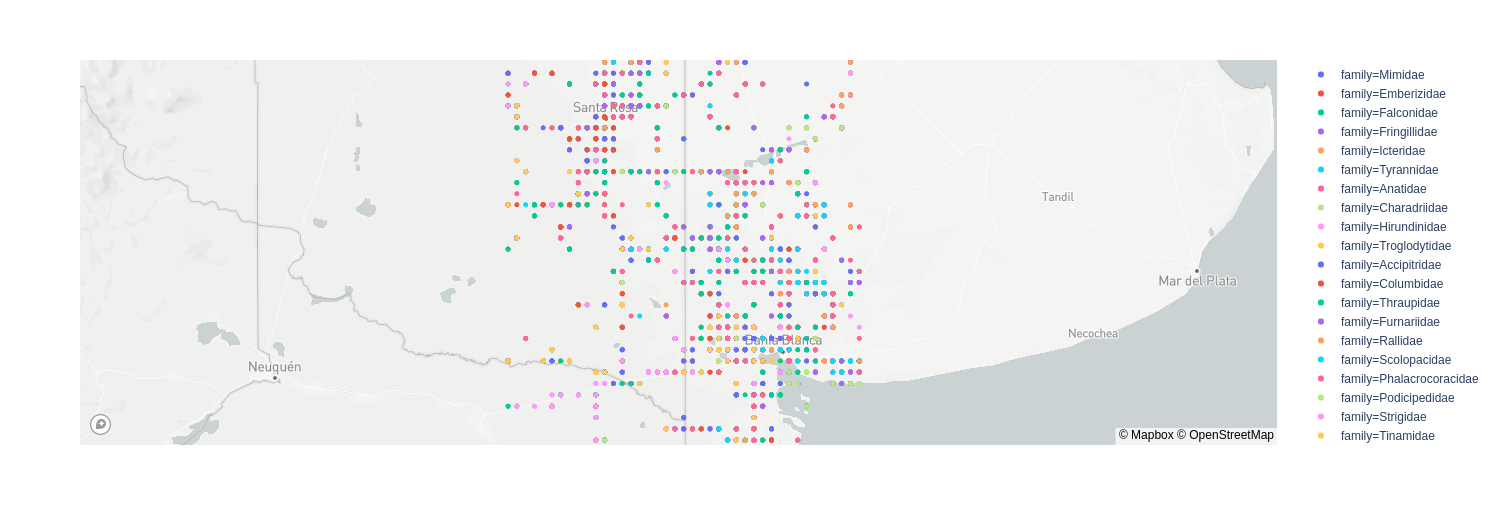